In [ ]:
import pandas as pd

df = pd.read_excel('resin-additives.xlsx')

result_dict = ['PE', 'PP', 'PVC', 'PS', 'ABS', 'PMMA', 'PA', 'PC', 'POM', 'PPO', 'PBT', 'PET', 'PTFE', 'PVDF', 
               'PI', 'PSF', 'PEEK', 'LCP', 'PAR', 'PPS', 'PUR', 'PR', 'EP', 'UP', 'Aminoplastics', 'SI', 
               'Cyanate Ester Resin', 'Bio-based', 'CFRP', 'GFRP']

resin_counts = {resin: 0 for resin in result_dict}
a=[]

for index, row in df.iterrows():
    resin_type = row['Resin_Type']  
    for product in df.columns[1:]:  

        product_name = row[product].split('(')[0].strip() if isinstance(row[product], str) else ''
        if product_name == 'N' or product_name == '' or product_name == 'Only mention':
            continue
        if resin_type in resin_counts and product_name!='':
            a.append(product_name)
            resin_counts[resin_type] += 1  
        if 'bio-based' in resin_type and product_name!='':
            a.append(product_name)
            resin_counts['Bio-based'] += 1


result_df = pd.DataFrame(list(resin_counts.items()), columns=['Resin_Type', 'Count'])
aa = pd.DataFrame(a, columns=['Product_Name'])  
result_df.to_excel('heat_result1.xlsx', index=False)
aa.to_excel('test.xlsx', index=False)



**HeatMap**

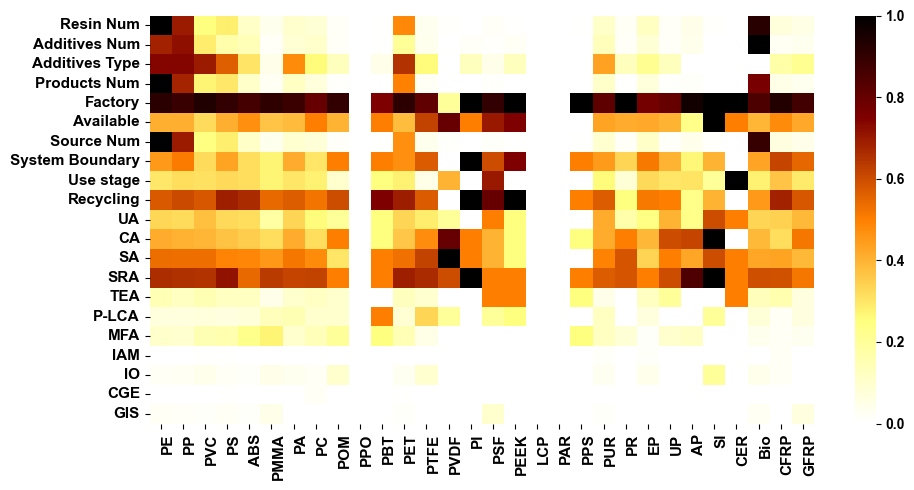

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('heatchart_final4.xlsx', index_col=0)
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'

plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(
    df,
    square=False,
    vmin=0,
    vmax=1,
    cmap="afmhot_r",
    annot=False,
    linewidths=0, 
    linecolor='white',
    cbar=True  
)
heatmap.set_xlabel('')  
heatmap.set_ylabel('') 

plt.setp(heatmap.get_xticklabels(), rotation=90, ha='left', fontsize=11)
plt.setp(heatmap.get_yticklabels(), fontsize=11)

plt.tight_layout()

plt.show()
